# Enriquecimento

Este notebook tem como objetivo tratar o dataset de caracteristica a fim de normalizado e gerar um dataset de feature já tratadas para que assim possam ser agregadas ao dataset original de produtos

### Imports

In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Carregando o dataset

In [2]:
df = pd.read_json('produto_caracteristica.json')

In [3]:
df

,descricao,ingredientes,alergicos,url,harmonizacao,temperatura,ibu
0,A Cerveja Adriática 600ml foi criada pelo alem...,": Água, malte e lúpulo.",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/adria...,None,None,NaN
1,Puro malte argentino inspirado no frescor das ...,": Água, malte e lúpulo.",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/andes,"Harmoniza com churrasco, choripan e queijos leves",None,NaN
2,"Beck’s é uma legítima German Lager Puro Malte,...",": Água, malte e lúpulo.",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/becks,"Por ser uma cerveja tradicional da Alemanha, h...",0-4 ºC,20.0
3,"Produzida e vendida somente no Piauí, ideal pa...",": Lúpulo, Água, Malte, Milho e Suco de Caju",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/berri...,"A Berrió harmoniza bem com paçoca, arroz Maria...",0-4 ºC,7.0
4,O processo de produçãoda Budweiser é diferenci...,": Água, malte, arroz e lúpulo.",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/budwe...,O sabor marcante no começo e suave no final de...,0-4 ºC,10.0
...,...,...,...,...,...,...,...
79,SESSION IPA,Session Beer é um estilo para se beber em gran...,"INGREDIENTES: Água, malte de cevada, lúpulo e ...",https://www.ambev.com.br/marcas/cervejas/wals/...,None,None,NaN
80,None,None,None,https://www.ambev.com.br/marcas/cervejas/wals/...,None,None,NaN
81,BELGIAN TRIPEL,A criatividade faz parte do DNA da Wäls e isso...,"INGREDIENTES: Água, malte de cevada, açúcar, l...",https://www.ambev.com.br/marcas/cervejas/wals/...,None,None,NaN
82,PALE ALE,Wäls Verano é a Pale Ale que o clima Brasileir...,"INGREDIENTES: Água, malte de cevada, lúpulo e ...",https://www.ambev.com.br/marcas/cervejas/wals/...,None,None,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   descricao     79 non-null     object 
 1   ingredientes  79 non-null     object 
 2   alergicos     78 non-null     object 
 3   url           84 non-null     object 
 4   harmonizacao  37 non-null     object 
 5   temperatura   36 non-null     object 
 6   ibu           36 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.7+ KB


### Ajustando os dados das colunas

Algumas informações ficaram em colunas erradas devido alguma diferença da estruturas das páginas no momento da extração dos dados. Será necessário identificar o padrão das informações a reacolar esses dados em suas respectivas features

In [5]:
filter = df['alergicos'].notna() & df['alergicos'].str.contains('INGREDIENTES')

In [6]:
df.loc[filter, 'descricao'] = df[filter]['ingredientes']
df.loc[filter, 'ingredientes'] = df[filter]['alergicos']
df.loc[filter, 'alergicos'] = ''

In [7]:
df

,descricao,ingredientes,alergicos,url,harmonizacao,temperatura,ibu
0,A Cerveja Adriática 600ml foi criada pelo alem...,": Água, malte e lúpulo.",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/adria...,None,None,NaN
1,Puro malte argentino inspirado no frescor das ...,": Água, malte e lúpulo.",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/andes,"Harmoniza com churrasco, choripan e queijos leves",None,NaN
2,"Beck’s é uma legítima German Lager Puro Malte,...",": Água, malte e lúpulo.",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/becks,"Por ser uma cerveja tradicional da Alemanha, h...",0-4 ºC,20.0
3,"Produzida e vendida somente no Piauí, ideal pa...",": Lúpulo, Água, Malte, Milho e Suco de Caju",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/berri...,"A Berrió harmoniza bem com paçoca, arroz Maria...",0-4 ºC,7.0
4,O processo de produçãoda Budweiser é diferenci...,": Água, malte, arroz e lúpulo.",: Contém cevada e glúten.,https://www.ambev.com.br/marcas/cervejas/budwe...,O sabor marcante no começo e suave no final de...,0-4 ºC,10.0
...,...,...,...,...,...,...,...
79,Session Beer é um estilo para se beber em gran...,"INGREDIENTES: Água, malte de cevada, lúpulo e ...",,https://www.ambev.com.br/marcas/cervejas/wals/...,None,None,NaN
80,None,None,None,https://www.ambev.com.br/marcas/cervejas/wals/...,None,None,NaN
81,A criatividade faz parte do DNA da Wäls e isso...,"INGREDIENTES: Água, malte de cevada, açúcar, l...",,https://www.ambev.com.br/marcas/cervejas/wals/...,None,None,NaN
82,Wäls Verano é a Pale Ale que o clima Brasileir...,"INGREDIENTES: Água, malte de cevada, lúpulo e ...",,https://www.ambev.com.br/marcas/cervejas/wals/...,None,None,NaN


## Ajustar features do dataset

Esse bloco tem como objetivo ajustar as features e padronizar os dados

In [8]:
def extract_brand(link: str):
    links = link.replace('https://www.ambev.com.br/marcas/cervejas/', '').split('/')
    links = [lk for lk in links if len(lk) > 0]

    if len(links) > 1:
        brand, _ = links
        links = [brand]

    return ''.join(links).upper().replace('-', ' ')

def extract_subbrand(link: str):
    links = link.replace('https://www.ambev.com.br/marcas/cervejas/', '').split('/')
    links = [lk for lk in links if len(lk) > 0]

    if len(links) > 1:
        brand, sub = links
        if sub.startswith(brand):
            links = [sub]

    return ''.join(links).upper().replace('-', ' ')

In [9]:
def extract_ingredients(ingredients: str) -> str:

    if not ingredients:
        return ''

    ingredients = ingredients.lower()
    ingredients = ingredients.replace('ingredientes', '')
    ingredients = ingredients.replace(':', '')
    ingredients = ingredients.replace(' e ', ', ')
    ingredients = ingredients.replace('.', '')
    return ingredients.strip().lower()

def extract_alergic(alergic: str) -> str:

    if not alergic:
        return ''

    alergic = alergic.lower()
    alergic = alergic.replace('contém', '')
    alergic = alergic.replace('contem', '')
    alergic = alergic.replace(':', '')
    alergic = alergic.replace(' e ', ', ')
    alergic = alergic.replace('.', '')
    return alergic.strip().lower()


In [10]:
df['marca'] = df['url'].apply(extract_brand)
df['submarca'] = df['url'].apply(extract_subbrand)
df['ingredientes'] = df['ingredientes'].apply(extract_ingredients)
df['alergicos'] = df['alergicos'].apply(extract_alergic)
df.drop(columns=['url'], inplace=True)

In [11]:
df.head()

,descricao,ingredientes,alergicos,harmonizacao,temperatura,ibu,marca,submarca
0,A Cerveja Adriática 600ml foi criada pelo alem...,"água, malte, lúpulo","cevada, glúten",None,None,NaN,ADRIATICA,ADRIATICA
1,Puro malte argentino inspirado no frescor das ...,"água, malte, lúpulo","cevada, glúten","Harmoniza com churrasco, choripan e queijos leves",None,NaN,ANDES,ANDES
2,"Beck’s é uma legítima German Lager Puro Malte,...","água, malte, lúpulo","cevada, glúten","Por ser uma cerveja tradicional da Alemanha, h...",0-4 ºC,20.0,BECKS,BECKS
3,"Produzida e vendida somente no Piauí, ideal pa...","lúpulo, água, malte, milho, suco de caju","cevada, glúten","A Berrió harmoniza bem com paçoca, arroz Maria...",0-4 ºC,7.0,BERRIO DO PIAUI,BERRIO DO PIAUI
4,O processo de produçãoda Budweiser é diferenci...,"água, malte, arroz, lúpulo","cevada, glúten",O sabor marcante no começo e suave no final de...,0-4 ºC,10.0,BUDWEISER,BUDWEISER


### Tratando dados missing

In [12]:
df.fillna('', inplace=True)
df

,descricao,ingredientes,alergicos,harmonizacao,temperatura,ibu,marca,submarca
0,A Cerveja Adriática 600ml foi criada pelo alem...,"água, malte, lúpulo","cevada, glúten",,,,ADRIATICA,ADRIATICA
1,Puro malte argentino inspirado no frescor das ...,"água, malte, lúpulo","cevada, glúten","Harmoniza com churrasco, choripan e queijos leves",,,ANDES,ANDES
2,"Beck’s é uma legítima German Lager Puro Malte,...","água, malte, lúpulo","cevada, glúten","Por ser uma cerveja tradicional da Alemanha, h...",0-4 ºC,20.0,BECKS,BECKS
3,"Produzida e vendida somente no Piauí, ideal pa...","lúpulo, água, malte, milho, suco de caju","cevada, glúten","A Berrió harmoniza bem com paçoca, arroz Maria...",0-4 ºC,7.0,BERRIO DO PIAUI,BERRIO DO PIAUI
4,O processo de produçãoda Budweiser é diferenci...,"água, malte, arroz, lúpulo","cevada, glúten",O sabor marcante no começo e suave no final de...,0-4 ºC,10.0,BUDWEISER,BUDWEISER
...,...,...,...,...,...,...,...,...
79,Session Beer é um estilo para se beber em gran...,"água, malte de cevada, lúpulo, levedura",,,,,WALS,WALS SESSION CITRA
80,,,,,,,WALS,WALS SESSION FREE
81,A criatividade faz parte do DNA da Wäls e isso...,"água, malte de cevada, açúcar, lúpulo, extrato...",,,,,WALS,WALS TRIPPEL
82,Wäls Verano é a Pale Ale que o clima Brasileir...,"água, malte de cevada, lúpulo, levedura",,,,,WALS,WALS VERANO


### Agregação de informação

A ideia é agregar as informações textuais em um bloco unico a fim de facilitar a tratativa do texto em um unico bag of words

In [13]:
df['descricao_completa'] = df['descricao'] + '. ' + df['harmonizacao'] + '. '+ df['ingredientes'] + '. '+ df['alergicos'] + '. ' + df['temperatura'] + '. ' + df['ibu'].astype(str)
df.drop(columns=['descricao', 'harmonizacao', 'temperatura', 'ibu'], inplace=True)

In [14]:
df.iloc[0]['descricao_completa']

'A Cerveja Adriática 600ml foi criada pelo alemão Henrique Thielen, um visionário cervejeiro do início do século XX. Ela teve seu nome em homenagem à cervejaria que traduz toda uma era de tradição passada de pai para filho. Hoje, conhecida como a irmã mais velha da Original, ela é uma pedida certa para a mesa de bar. Reconhecidamente uma cerveja puro malte de alta qualidade, fácil de beber e com aromas especiais que dão um toque equilibrado.. . água, malte, lúpulo. cevada, glúten. . '

In [15]:
df.head()

,ingredientes,alergicos,marca,submarca,descricao_completa
0,"água, malte, lúpulo","cevada, glúten",ADRIATICA,ADRIATICA,A Cerveja Adriática 600ml foi criada pelo alem...
1,"água, malte, lúpulo","cevada, glúten",ANDES,ANDES,Puro malte argentino inspirado no frescor das ...
2,"água, malte, lúpulo","cevada, glúten",BECKS,BECKS,"Beck’s é uma legítima German Lager Puro Malte,..."
3,"lúpulo, água, malte, milho, suco de caju","cevada, glúten",BERRIO DO PIAUI,BERRIO DO PIAUI,"Produzida e vendida somente no Piauí, ideal pa..."
4,"água, malte, arroz, lúpulo","cevada, glúten",BUDWEISER,BUDWEISER,O processo de produçãoda Budweiser é diferenci...


In [16]:
df.drop(columns=['ingredientes', 'alergicos', 'marca'], inplace=True)

## Criação das features

Este bloco tem como finalidade criar as features com base das colunas do dataset ajustado

In [17]:
df_feature = pd.DataFrame(df['submarca'], index=df.index)
df_feature.head()

,submarca
0,ADRIATICA
1,ANDES
2,BECKS
3,BERRIO DO PIAUI
4,BUDWEISER


### Criação da feature descricao_completa

Neste processo será utilizado a lib do spacy para criar um bag of words e assim poder quebrar a descrição em tokens, removendo caracteres que são considerado stop words, pontuação e trazer a palavra base (radical) a fim de padronizar cada token.

Será utilizado um modelo já treinado pela propria biblioteca para simplificar o processo, evitando assim, criar um modelo próprio.

In [18]:
nlp = spacy.load('pt_core_news_lg')

Pipelines utilizada no processo

In [19]:
nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Função que transformará uma sentença em um conjuto de tokens

In [20]:
def get_token(sentence: str):
    return ' '.join([word.lemma_ for word in nlp(sentence) if not (word.is_stop or
                                                        word.is_punct or
                                                        word.is_space or
                                                        len(word) == 1)])

In [21]:
df['descricao_ajustada'] = df['descricao_completa'].apply(get_token)

Criação do saco de palavras (bag of words)

In [22]:
bag_of_word = CountVectorizer(min_df=0.08, ngram_range=(1,2), stop_words=spacy.lang.pt.STOP_WORDS)
bow = bag_of_word.fit_transform(df['descricao_ajustada'])

In [23]:
bag_of_word.vocabulary_

{'cerveja': 13,
 'criar': 27,
 'nome': 72,
 'cervejar': 14,
 'passar': 75,
 'hoje': 47,
 'puro': 82,
 'maltar': 60,
 'alto': 1,
 'qualidade': 84,
 'aromar': 5,
 'especial': 33,
 'equilibrar': 31,
 'água': 97,
 'lúpulo': 56,
 'cevar': 16,
 'glúten': 43,
 'puro maltar': 83,
 'água maltar': 98,
 'maltar lúpulo': 62,
 'lúpulo cevar': 57,
 'cevar glúten': 18,
 'harmoniza': 45,
 'queijo': 85,
 'leve': 53,
 'lager': 49,
 'malte': 65,
 'amargor': 2,
 'resultar': 89,
 'sabor': 90,
 'marcante': 67,
 'característico': 11,
 'único': 99,
 'mundo': 71,
 'tradicional': 93,
 'harmonizar': 46,
 'prato': 79,
 'peixe': 76,
 'fruto': 41,
 'mar': 66,
 'salada': 91,
 'refrescância': 88,
 'ºc': 96,
 'fruto mar': 42,
 'glúten ºc': 44,
 'receitar': 86,
 'ingrediente': 48,
 'levar': 51,
 'refrescante': 87,
 'milho': 69,
 'levar refrescante': 52,
 'maltar milho': 63,
 'fermentação': 39,
 'suave': 92,
 'clássico': 21,
 'castanho': 12,
 'marcar': 68,
 'brasil': 9,
 'encorpar': 30,
 'levedura': 54,
 'noto': 73,
 'm

In [24]:
len(bag_of_word.vocabulary_)

100

In [25]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=spacy.lang.pt.STOP_WORDS)

In [27]:
cloud = wordcloud.generate(' '.join(bag_of_word.vocabulary_.keys()))

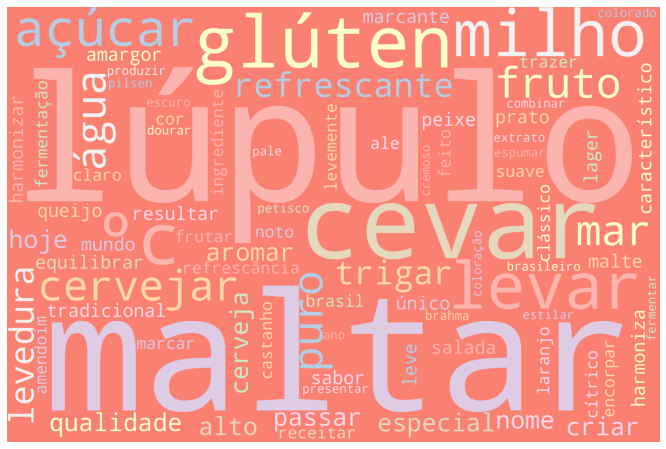

In [28]:
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [29]:
tfidf = TfidfVectorizer(vocabulary=bag_of_word.vocabulary_)
matrix = tfidf.fit_transform(df['descricao_ajustada'])

In [30]:
df_desc = pd.DataFrame(matrix.todense(), columns=tfidf.get_feature_names(), index=df.index)
df_desc.head()

,ale,alto,amargor,amendoim,ano,aromar,açúcar,açúcar lúpulo,brahma,brasil,...,sabor,salada,suave,tradicional,trazer,trigar,ºc,água,água maltar,único
0,0.0,0.284281,0.00000,0.0,0.0,0.170864,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.098314,0.0,0.000000
1,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.130417,0.0,0.000000
2,0.0,0.196094,0.28816,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.204332,0.162957,0.000000,0.210029,0.0,0.0,0.121535,0.067816,0.0,0.210029
3,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.175158,0.000000,0.000000,0.000000,0.0,0.0,0.208365,0.116267,0.0,0.000000
4,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.260695,0.000000,0.446753,0.000000,0.0,0.0,0.155059,0.086523,0.0,0.267964


In [31]:
df_feature_final = pd.concat([df_feature, df_desc], axis=1)
df_feature_final.head()

,submarca,ale,alto,amargor,amendoim,ano,aromar,açúcar,açúcar lúpulo,brahma,...,sabor,salada,suave,tradicional,trazer,trigar,ºc,água,água maltar,único
0,ADRIATICA,0.0,0.284281,0.00000,0.0,0.0,0.170864,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.098314,0.0,0.000000
1,ANDES,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.130417,0.0,0.000000
2,BECKS,0.0,0.196094,0.28816,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.204332,0.162957,0.000000,0.210029,0.0,0.0,0.121535,0.067816,0.0,0.210029
3,BERRIO DO PIAUI,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.175158,0.000000,0.000000,0.000000,0.0,0.0,0.208365,0.116267,0.0,0.000000
4,BUDWEISER,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.260695,0.000000,0.446753,0.000000,0.0,0.0,0.155059,0.086523,0.0,0.267964


In [32]:
df_feature_final.to_csv('produto_caracteristica_feature.csv', header=True)

In [33]:
df.to_csv('produto_caracteristica_ajustado.csv', header=True)

## Persistencias dos objetos utilizados

In [34]:
import pickle

pickle.dump(get_token, open('get_token.pickle', 'wb'))
# pickle.dump(ingrediente_label, open('ingrediente_label.pickle', 'wb'))
# pickle.dump(alergico_label, open('alergico_label.pickle', 'wb'))
pickle.dump(bag_of_word, open('count_vectorize.pickle', 'wb'))
pickle.dump(tfidf, open('tf_idf.pickle', 'wb'))